In [12]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

In [13]:
class Model(nn.Module):
    
    def __init__(self,in_features=4,h1=6,h2=6,out_features=3):

        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
    
    def forward(self,x):
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x

In [14]:
model = Model()

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df = pd.read_csv("original\\PYTORCH_NOTEBOOKS\\Data\\iris.csv")

In [17]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [18]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


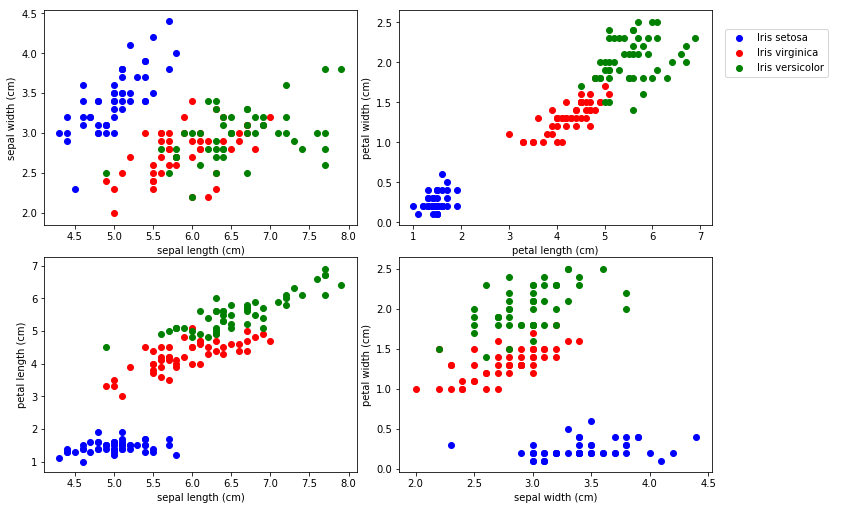

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [20]:
X = df.drop('target',axis=1).values
Y = df['target'].values

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [23]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [24]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [25]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [26]:
model.parameters()

<generator object Module.parameters at 0x000001B215606DE0>

In [27]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=6, bias=True)
  (fc2): Linear(in_features=6, out_features=6, bias=True)
  (out): Linear(in_features=6, out_features=3, bias=True)
)>

In [28]:
epochs = 150
losses = []

for i in range(epochs):
    
    y_pred = model.forward(X_train)
    
    loss = criterion(y_pred,y_train)
    losses.append(loss)
    
    if i%10==0:
        print(f'Epoch {i} and loss is: {loss}')
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0 and loss is: 1.218578577041626
Epoch 10 and loss is: 1.0852177143096924
Epoch 20 and loss is: 1.054904818534851
Epoch 30 and loss is: 0.998996376991272
Epoch 40 and loss is: 0.8973413109779358
Epoch 50 and loss is: 0.7584510445594788
Epoch 60 and loss is: 0.6460441946983337
Epoch 70 and loss is: 0.5638423562049866
Epoch 80 and loss is: 0.4979070723056793
Epoch 90 and loss is: 0.4489673674106598
Epoch 100 and loss is: 0.41103124618530273
Epoch 110 and loss is: 0.3768875300884247
Epoch 120 and loss is: 0.34163615107536316
Epoch 130 and loss is: 0.3050767779350281
Epoch 140 and loss is: 0.2682822048664093


Text(0.5, 0, 'Epoch')

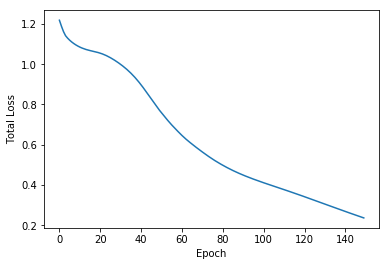

In [29]:
plt.plot(range(epochs),losses)
plt.ylabel('Total Loss')
plt.xlabel('Epoch')

In [30]:
with torch.no_grad():  # turns of autograd function of PyTorch and does not keep track of these variables for backprop
    y_eval = model.forward(X_test)
    loss_test = criterion(y_eval,y_test)

In [31]:
loss_test

tensor(0.1903)

In [32]:
correct = 0

with torch.no_grad():
    
    for i, data in enumerate(X_test):
        
        y_val = model.forward(data)
         
        print(f'{i+1}.)   {str(y_val.argmax().item())}    {y_test[i]}')
        
        if y_val.argmax().item() == y_test[i]:
            correct += 1
            
print(f'We got {correct} correct.')

1.)   1    1
2.)   0    0
3.)   1    1
4.)   2    2
5.)   2    2
6.)   2    2
7.)   0    0
8.)   0    0
9.)   2    2
10.)   0    0
11.)   0    0
12.)   2    2
13.)   2    2
14.)   2    2
15.)   2    2
16.)   2    2
17.)   1    1
18.)   0    0
19.)   0    0
20.)   2    2
21.)   1    1
22.)   1    1
23.)   1    1
24.)   2    2
25.)   2    2
26.)   0    0
27.)   1    1
28.)   2    2
29.)   0    0
30.)   1    1
We got 30 correct.


In [33]:
torch.save(model.state_dict(),'my_iris_model.pt')

In [34]:
new_model = Model() 
new_model.load_state_dict(torch.load('my_iris_model.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [35]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=6, bias=True)
  (fc2): Linear(in_features=6, out_features=6, bias=True)
  (out): Linear(in_features=6, out_features=3, bias=True)
)

In [44]:
mystery_iris = torch.tensor([6.6,2.2,6.2,2.7])

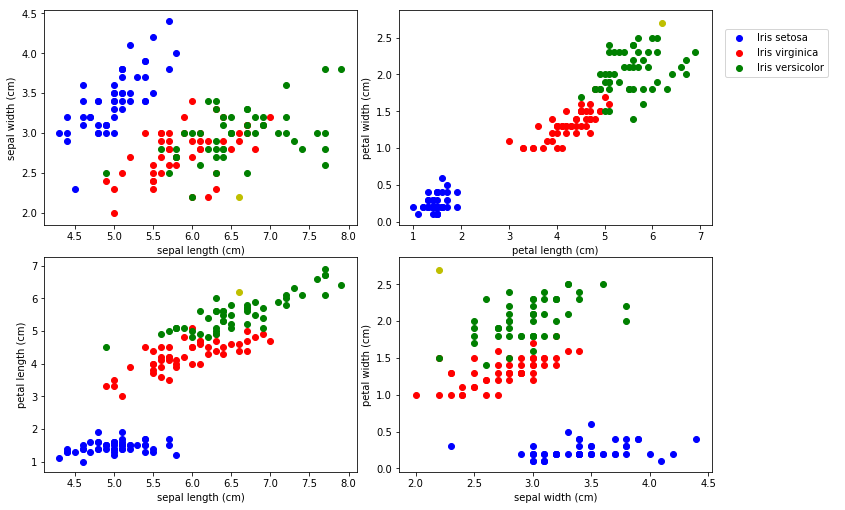

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
    
    ax.scatter(mystery_iris[plots[i][0]],mystery_iris[plots[i][1]], color = 'y')

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [46]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print(new_model(mystery_iris).argmax().item())

tensor([-7.0291,  4.5400,  8.3622])
2
